In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import sys
from itertools import chain

import numpy as np

from bounding_box_classifiers.obama_detector import train_helper, BasicConvNet

In [3]:
data_dir = "data/bounding-box-obama-detector"
# data_dir = "data/obama-detector"

static_params = {
    "seed": 1,
    "data_dir": data_dir,
    "use_cuda": True,
    "val_batch_size": 64,
    "epochs": 10,
    "log_interval": 10
}

variable_params = {
    "lr": [0.1, 0.01, 0.001, 0.001],
    "momentum": [0.5, 0.6, 0.7, 0.8, 0.9],
    "batch_size": [32, 64, 128],
    "use_pretrained": [True, False],
    "feature_extract": [True, False]
}

In [4]:
# Run random search
used_variable_params = set()
param_space_size = np.prod([len(p) for p in variable_params])
while len(used_variable_params) < param_space_size:
    curr_params = {k: random.choice(v) for k, v in variable_params.items()}
    curr_variable_params = tuple(chain.from_iterable(curr_params.items()))

    if curr_variable_params not in used_variable_params:
        print("Current variable parameters:", curr_variable_params)
        used_variable_params.add(curr_variable_params)
        curr_params.update(static_params)
        train_helper(**curr_params)

Current variable parameters: ('lr', 0.001, 'momentum', 0.7, 'batch_size', 32, 'use_pretrained', True, 'feature_extract', True)
Params to learn:
	 classifier.6.weight
	 classifier.6.bias
Train Epoch: 1 [0/248 (0%)]	Loss: 0.692773

Test set: Average loss: 0.6690, Accuracy: 40/64 (62%)

Train Epoch: 2 [0/248 (0%)]	Loss: 0.694347

Test set: Average loss: 0.6630, Accuracy: 39/64 (61%)

Train Epoch: 3 [0/248 (0%)]	Loss: 0.732508

Test set: Average loss: 0.6538, Accuracy: 44/64 (69%)

Train Epoch: 4 [0/248 (0%)]	Loss: 0.709194

Test set: Average loss: 0.6519, Accuracy: 43/64 (67%)

Train Epoch: 5 [0/248 (0%)]	Loss: 0.707319

Test set: Average loss: 0.6558, Accuracy: 42/64 (66%)

Train Epoch: 6 [0/248 (0%)]	Loss: 0.711213

Test set: Average loss: 0.6543, Accuracy: 42/64 (66%)

Train Epoch: 7 [0/248 (0%)]	Loss: 0.610769

Test set: Average loss: 0.6546, Accuracy: 42/64 (66%)

Train Epoch: 8 [0/248 (0%)]	Loss: 0.632134

Test set: Average loss: 0.6506, Accuracy: 43/64 (67%)

Train Epoch: 9 [0/248 

Train Epoch: 6 [0/248 (0%)]	Loss: 0.664400

Test set: Average loss: 0.6873, Accuracy: 34/64 (53%)

Train Epoch: 7 [0/248 (0%)]	Loss: 0.714233

Test set: Average loss: 0.6821, Accuracy: 37/64 (58%)

Train Epoch: 8 [0/248 (0%)]	Loss: 0.711233

Test set: Average loss: 0.6922, Accuracy: 32/64 (50%)

Train Epoch: 9 [0/248 (0%)]	Loss: 0.702918

Test set: Average loss: 0.7064, Accuracy: 31/64 (48%)

Train Epoch: 10 [0/248 (0%)]	Loss: 0.736208

Test set: Average loss: 0.7369, Accuracy: 32/64 (50%)

Current variable parameters: ('lr', 0.1, 'momentum', 0.6, 'batch_size', 32, 'use_pretrained', True, 'feature_extract', True)
Params to learn:
	 classifier.6.weight
	 classifier.6.bias
Train Epoch: 1 [0/248 (0%)]	Loss: 0.692773

Test set: Average loss: 1.4422, Accuracy: 36/64 (56%)

Train Epoch: 2 [0/248 (0%)]	Loss: 1.640016

Test set: Average loss: 4.8612, Accuracy: 32/64 (50%)

Train Epoch: 3 [0/248 (0%)]	Loss: 3.609495

Test set: Average loss: 3.9841, Accuracy: 34/64 (53%)

Train Epoch: 4 [0/248 (

Train Epoch: 1 [0/248 (0%)]	Loss: 0.709296

Test set: Average loss: 4.6704, Accuracy: 32/64 (50%)

Train Epoch: 2 [0/248 (0%)]	Loss: 0.672187

Test set: Average loss: 1.5427, Accuracy: 33/64 (52%)

Train Epoch: 3 [0/248 (0%)]	Loss: 0.638275

Test set: Average loss: 1.3225, Accuracy: 33/64 (52%)

Train Epoch: 4 [0/248 (0%)]	Loss: 0.702932

Test set: Average loss: 0.7239, Accuracy: 36/64 (56%)

Train Epoch: 5 [0/248 (0%)]	Loss: 0.519329

Test set: Average loss: 0.6888, Accuracy: 43/64 (67%)

Train Epoch: 6 [0/248 (0%)]	Loss: 0.490576

Test set: Average loss: 0.7114, Accuracy: 39/64 (61%)

Train Epoch: 7 [0/248 (0%)]	Loss: 0.513170

Test set: Average loss: 0.7439, Accuracy: 39/64 (61%)

Train Epoch: 8 [0/248 (0%)]	Loss: 0.503807

Test set: Average loss: 0.8083, Accuracy: 35/64 (55%)

Train Epoch: 9 [0/248 (0%)]	Loss: 0.381869

Test set: Average loss: 0.8382, Accuracy: 40/64 (62%)

Train Epoch: 10 [0/248 (0%)]	Loss: 0.474625

Test set: Average loss: 0.8081, Accuracy: 40/64 (62%)

Current v

RuntimeError: CUDA out of memory. Tried to allocate 196.00 MiB (GPU 0; 10.91 GiB total capacity; 9.26 GiB already allocated; 34.19 MiB free; 591.51 MiB cached)

# Best results from Random Search
## Bounding Box Data
Both with 62% test accuracy:
```
('lr', 0.001, 'momentum', 0.9, 'batch_size', 32)  # epoch 2
('lr', 0.01, 'momentum', 0.6, 'batch_size', 32)  # epoch 5
```

## Unfiltered Data
Both with 64% test accuracy:
```
('lr', 0.001, 'momentum', 0.8, 'batch_size', 32)  # epoch 10
('lr', 0.01, 'momentum', 0.7, 'batch_size', 64)  # epoch 7
```

In [6]:
# Reproduce best results
best_params = {
    "lr": 0.001,
    "momentum": 0.8,
    "batch_size": 32
}
best_params.update(static_params)
best_model_state_dict = train_helper(**best_params)

Train Epoch: 1 [0/10316 (0%)]	Loss: 0.708778
Train Epoch: 1 [320/10316 (3%)]	Loss: 4.690603
Train Epoch: 1 [640/10316 (6%)]	Loss: 6.382060
Train Epoch: 1 [960/10316 (9%)]	Loss: 2.631079
Train Epoch: 1 [1280/10316 (12%)]	Loss: 2.291182
Train Epoch: 1 [1600/10316 (15%)]	Loss: 1.214202
Train Epoch: 1 [1920/10316 (19%)]	Loss: 4.679149
Train Epoch: 1 [2240/10316 (22%)]	Loss: 2.271395
Train Epoch: 1 [2560/10316 (25%)]	Loss: 1.868342
Train Epoch: 1 [2880/10316 (28%)]	Loss: 3.437724
Train Epoch: 1 [3200/10316 (31%)]	Loss: 2.246175
Train Epoch: 1 [3520/10316 (34%)]	Loss: 3.697438
Train Epoch: 1 [3840/10316 (37%)]	Loss: 1.397669
Train Epoch: 1 [4160/10316 (40%)]	Loss: 1.341598
Train Epoch: 1 [4480/10316 (43%)]	Loss: 1.629486
Train Epoch: 1 [4800/10316 (46%)]	Loss: 0.947555
Train Epoch: 1 [5120/10316 (50%)]	Loss: 0.999870
Train Epoch: 1 [5440/10316 (53%)]	Loss: 0.863347
Train Epoch: 1 [5760/10316 (56%)]	Loss: 1.229096
Train Epoch: 1 [6080/10316 (59%)]	Loss: 2.203871
Train Epoch: 1 [6400/10316 (62

Train Epoch: 5 [10240/10316 (99%)]	Loss: 0.600020

Test set: Average loss: 1.0937, Accuracy: 1297/2580 (50%)

Train Epoch: 6 [0/10316 (0%)]	Loss: 0.976050
Train Epoch: 6 [320/10316 (3%)]	Loss: 0.606894
Train Epoch: 6 [640/10316 (6%)]	Loss: 0.872628
Train Epoch: 6 [960/10316 (9%)]	Loss: 0.634191
Train Epoch: 6 [1280/10316 (12%)]	Loss: 0.758561
Train Epoch: 6 [1600/10316 (15%)]	Loss: 0.776921
Train Epoch: 6 [1920/10316 (19%)]	Loss: 0.935130
Train Epoch: 6 [2240/10316 (22%)]	Loss: 0.703024
Train Epoch: 6 [2560/10316 (25%)]	Loss: 0.539086
Train Epoch: 6 [2880/10316 (28%)]	Loss: 0.645993
Train Epoch: 6 [3200/10316 (31%)]	Loss: 0.734172
Train Epoch: 6 [3520/10316 (34%)]	Loss: 0.814377
Train Epoch: 6 [3840/10316 (37%)]	Loss: 0.755478
Train Epoch: 6 [4160/10316 (40%)]	Loss: 0.785209
Train Epoch: 6 [4480/10316 (43%)]	Loss: 0.669130
Train Epoch: 6 [4800/10316 (46%)]	Loss: 0.732348
Train Epoch: 6 [5120/10316 (50%)]	Loss: 0.626097
Train Epoch: 6 [5440/10316 (53%)]	Loss: 0.655135
Train Epoch: 6 [57

Train Epoch: 10 [9280/10316 (90%)]	Loss: 0.785324
Train Epoch: 10 [9600/10316 (93%)]	Loss: 0.707931
Train Epoch: 10 [9920/10316 (96%)]	Loss: 0.636392
Train Epoch: 10 [10240/10316 (99%)]	Loss: 0.795905

Test set: Average loss: 0.6327, Accuracy: 1659/2580 (64%)



# Create visualizations

In [7]:
import sys
sys.path.append('pytorch_cnn_visualizations')

import torch
from PIL import Image

from bounding_box_classifiers.obama_detector import data_loaders
from pytorch_cnn_visualizations.vanilla_backprop import VanillaBackprop
from pytorch_cnn_visualizations.guided_backprop import GuidedBackprop
from pytorch_cnn_visualizations.misc_functions import preprocess_image, format_np_output

In [8]:
def show_gradient_images(gradient):
    # Normalize
    gradient = gradient - gradient.min()
    gradient /= gradient.max()
    
    # Show PIL image
    return Image.fromarray(format_np_output(gradient))

In [ ]:
device = torch.device("cuda")

# Load data
train_loader, test_loader = data_loaders(data_dir, use_cuda=True, 
                                         batch_size=1, val_batch_size=1)

dataset = test_loader.dataset
examples = [(i, dataset[i]) for i in range(len(dataset)) if dataset[i][1] == 1]

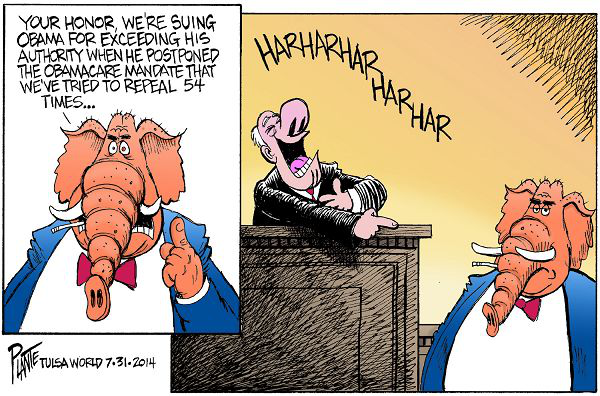

In [46]:
example_num = 358
example_x, example_y = examples[example_num][1]
original_example_num = examples[example_num][0]

example_x = example_x.unsqueeze(dim=0)
example_x = example_x.to(device)
example_x.requires_grad_()

# Display_image
original_x = test_loader.dataset.samples[original_example_num][0]
im = Image.open(original_x).convert('RGB')
imt

In [47]:
# Load best model weights
best_model = BasicConvNet()
best_model.load_state_dict(best_model_state_dict)
best_model.to(device)

BasicConvNet(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=107648, out_features=2, bias=True)
)

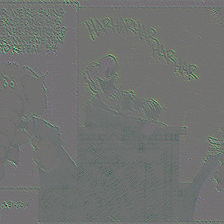

In [48]:
# Guided backprop
GBP = GuidedBackprop(best_model)

# Generate gradients
guided_grads = GBP.generate_gradients(example_x, example_y)
show_gradient_images(guided_grads)

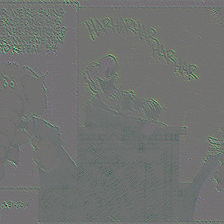

In [49]:
# Vanilla backprop
VBP = VanillaBackprop(best_model)

# Generate gradients
vanilla_grads = VBP.generate_gradients(example_x, example_y)
show_gradient_images(vanilla_grads)